In [1]:
import torch
import matplotlib.pyplot as plt

`true_m` and `true_b` are the true parameters of the function for the training data.

Prepare the data, randomize all input x, then calculate the true y.

In [2]:
true_m = torch.randn(1)
true_b = torch.randn(1)
x = torch.randn((100000, 1))
y = x * true_m + true_b

print(true_m, true_b)

tensor([-1.8583]) tensor([-0.1239])


Create two trainable parameters, `m` and `b` for our linear regressor. Don't forget to use `requires_grad=True` to enable backprop.

Also create the optimizer to train the parameters (in this case, we will use classic SGD).

In [3]:
m = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
m_res = torch.tensor(m.item(), requires_grad=True)
b_res = torch.tensor(b.item(), requires_grad=True)
print(m, m_res, b, b_res)

learning_rate = 1e-6
optimizer = torch.optim.SGD((m, b), lr=learning_rate, momentum=0.9, nesterov=True)

tensor([ 0.4960]) tensor(0.4960) tensor([ 0.4159]) tensor(0.4159)


Run the training procedure:

1. Calculate the predicted y (`y_hat`) using our parameters.
2. Calculate the loss
3. Reset the gradient to zero before doing backprop, then do the gradient descent by running `optimizer.step()` to update our parameters.

In [4]:
plot_loss = []
for i in range(100):
    y_hat = x * m + b
    
    loss = (y - y_hat).pow(2).sum()
    plot_loss.append(loss.item())
    print(i, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 585744.625
1 224070.078125
2 28323.51953125
3 7215.82275390625
4 62508.3984375
5 101476.1953125
6 92348.640625
7 53975.02734375
8 18011.337890625
9 1347.2984619140625
10 1669.3050537109375
11 7813.2119140625
12 10992.5458984375
13 9145.1298828125
14 4872.65673828125
15 1385.135009765625
16 40.27137756347656
17 296.4476013183594
18 939.7958984375
19 1167.720458984375
20 890.5192260742188
21 430.0277404785156
22 100.5758285522461
23 0.22103548049926758
24 45.59273147583008
25 109.50829315185547
26 121.79667663574219
27 85.23897552490234
28 36.99849319458008
29 6.752368927001953
30 0.2106662541627884
31 6.395590305328369
32 12.419008255004883
33 12.48345947265625
34 8.014311790466309
35 3.090942621231079
36 0.4037013649940491
37 0.09540515393018723
38 0.8408044576644897
39 1.3753445148468018
40 1.258092999458313
41 0.7395108938217163
42 0.24938946962356567
43 0.019938161596655846
44 0.02219664677977562
45 0.10525196045637131
46 0.1490931361913681
47 0.12470494955778122
48 0.066866137087

In [5]:
print("True m = {}, True b = {}".format(true_m.item(), true_b.item()))
print("Trained m = {}, Trained b = {}".format(m.item(), b.item()))

True m = -1.858290433883667, True b = -0.12392416596412659
Trained m = -1.8582905530929565, Trained b = -0.12392418831586838


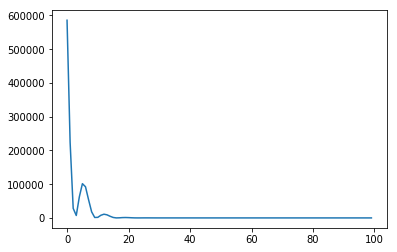

In [6]:
plt.plot(plot_loss)
plt.show()

In [7]:
optimizer_res = torch.optim.SGD((m_res, b_res), lr=learning_rate, momentum=0.9, nesterov=True)

In [8]:
plot_loss_res = []
for i in range(100):
    y_hat_res = (x * m_res + b_res) + x
    
    loss_res = (y - y_hat_res).pow(2).sum()
    plot_loss_res.append(loss_res.item())
    print(i, loss_res.item())
    
    optimizer_res.zero_grad()
    loss_res.backward()
    optimizer_res.step()

0 1158372.25
1 443348.5
2 56152.421875
3 14198.02734375
4 123464.2734375
5 200625.125
6 182723.265625
7 106903.625
8 35740.609375
9 2697.82470703125
10 3274.629150390625
11 15420.8916015625
12 21738.322265625
13 18112.83984375
14 9668.8896484375
15 2758.944580078125
16 82.8564682006836
17 581.0178833007812
18 1854.420166015625
19 2310.486328125
20 1766.0225830078125
21 855.3427124023438
22 201.4110107421875
23 0.5614165663719177
24 89.34298706054688
25 216.11236572265625
26 241.1865234375
27 169.31224060058594
28 73.80900573730469
29 13.629456520080566
30 0.3924652636051178
31 12.536612510681152
32 24.52054786682129
33 24.748769760131836
34 15.951499938964844
35 6.189667224884033
36 0.8254281282424927
37 0.18130424618721008
38 1.6492027044296265
39 2.717550277709961
40 2.4976842403411865
41 1.475488305091858
42 0.5018923878669739
43 0.04177992045879364
44 0.04256884753704071
45 0.20666347444057465
46 0.294913113117218
47 0.24801521003246307
48 0.13383749127388
49 0.03905909135937691
50

In [9]:
print("True m = {}, True b = {}".format(true_m.item(), true_b.item()))
print("Trained m = {}, Trained b = {}".format(m_res.item(), b_res.item()))

True m = -1.858290433883667, True b = -0.12392416596412659
Trained m = -2.858290433883667, Trained b = -0.12392418831586838


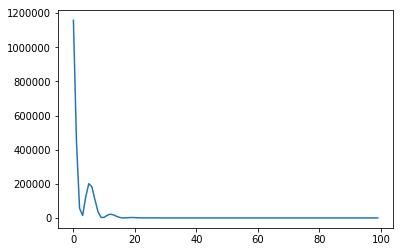

In [10]:
plt.plot(plot_loss_res)
plt.show()

In [11]:
print(torch.sum(y_hat - y_hat_res))

tensor(1.00000e-04 *
       -5.6355)
